# About

The purpose of this notebook is to generate the images used to demonstrate property calculations using coxeter.
Plots are rendered using matplotlib, and shapes are rendered using fresnel.

In [304]:
import coxeter
import fresnel
from matplotlib import pyplot as plt, patches
import numpy as np
import PIL

In [2]:
%matplotlib widget

## Check points inside shape

Make a plot of checking if points are in shape.

In [3]:
radius = 1
circle = coxeter.shapes.Circle(radius)

In [4]:
test_points = np.random.rand(10000, 3) * 2 - 1
test_points[:, 2] = 0

In [5]:
is_inside = circle.is_inside(test_points)

In [332]:
fig, ax = plt.subplots(figsize=(6, 6))
circle_plot = ax.add_patch(patches.Circle(circle.center[:2], circle.radius, fill=False, linewidth=2, edgecolor='k'))
ax.scatter(test_points[is_inside][:, 0], test_points[is_inside][:, 1], c='blue', s=1)
ax.scatter(test_points[~is_inside][:, 0], test_points[~is_inside][:, 1], c='red', s=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [334]:
fig.savefig('is_inside.png', transparent=True)

## Plot inspheres

Plot the insphere of a shape.

In [309]:
device = fresnel.Device()
scene = fresnel.Scene(device)

for i, shape_name in enumerate(coxeter.families.PlatonicFamily.data):
    shape = coxeter.families.PlatonicFamily.get_shape(shape_name)
    
    # First make the shape and set up its properties.
    poly_info = fresnel.util.convex_polyhedron_from_vertices(shape.vertices)
    for j in range(len(poly_info['face_sides'])):
        poly_info['face_color'][j] = fresnel.color.linear([0, 0, 0])
    primitive = fresnel.geometry.ConvexPolyhedron(scene,
                                                  poly_info,
                                                  N=1
                                                 )
    primitive.outline_width = 0.01
    primitive.material = fresnel.material.Material(color=fresnel.color.linear([0.99, 0.99, 0.99]),
                                              roughness=0.95,
                                              spec_trans=0.95,
                                             )

    primitive.position[:] = [[2 * i, 0, 0]]
    primitive.orientation[:] = [[ 0.54916838, -0.20295039, -0.5506242 ,  0.59501111]]
    primitive.material.primitive_color_mix = 0.0
    primitive.color_by_face = 0.0

    # Now draw the insphere within the shape.
    insphere = shape.insphere
    sphere = fresnel.geometry.Sphere(scene, N=1)
    sphere.material = fresnel.material.Material(color=fresnel.color.linear([0.25, 0.5, 0.9]),
                                                roughness=0.8)

    sphere.position[:] = [[2 * i, 0, 0]]
    # Make the sphere a little bit smaller than it really is,
    # otherwise you get artifacts near the intersection of the
    # polyhedron and the insphere.
    sphere.radius[:] = [insphere.radius * 0.99]

In [318]:
scene.camera = fresnel.camera.fit(scene, view='front', margin=3)

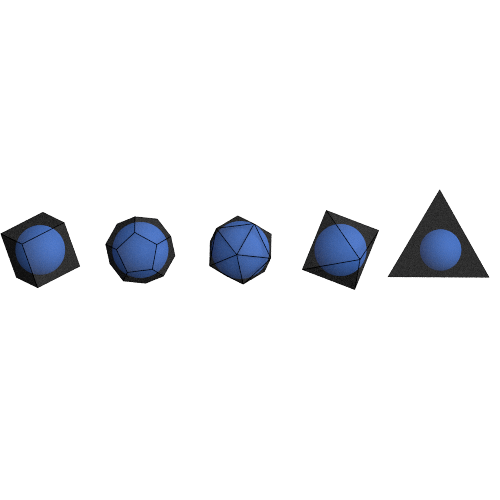

In [319]:
tracer = fresnel.tracer.Path(device=device, w=500, h=500)
out = tracer.sample(scene, samples=64, light_samples=40)
out

In [320]:
image = PIL.Image.fromarray(out[:], mode='RGBA')
image.save('inspheres.png')

## Plot circumspheres

Plot the circumsphere of a shape.

In [324]:
device = fresnel.Device()
scene = fresnel.Scene(device)

for i, shape_name in enumerate(coxeter.families.PlatonicFamily.data):
    shape = coxeter.families.PlatonicFamily.get_shape(shape_name)
    
    # First make the shape and set up its properties.
    poly_info = fresnel.util.convex_polyhedron_from_vertices(shape.vertices)
    for j in range(len(poly_info['face_sides'])):
        poly_info['face_color'][j] = fresnel.color.linear([0, 0, 0])
    primitive = fresnel.geometry.ConvexPolyhedron(scene,
                                                  poly_info,
                                                  N=1
                                                 )
    primitive.outline_width = 0.01
    primitive.material = fresnel.material.Material(color=fresnel.color.linear([0.99, 0.99, 0.99]),
                                                   roughness=0.8,
                                                  )

    primitive.position[:] = [[2.5 * i, 0, 0]]
    primitive.orientation[:] = [[ 0.54916838, -0.20295039, -0.5506242 ,  0.59501111]]
    primitive.material.primitive_color_mix = 0.0
    primitive.color_by_face = 0.0

    # Now draw the circumsphere within the shape.
    circumsphere = shape.circumsphere
    sphere = fresnel.geometry.Sphere(scene, N=1)
    sphere.material = fresnel.material.Material(color=fresnel.color.linear([0.25, 0.5, 0.9]),
                                                roughness=0.95,
                                                spec_trans=0.95)

    sphere.position[:] = [[2.5 * i, 0, 0]]
    # Make the sphere a little bit bigger than it really is,
    # otherwise you get artifacts near the intersection of the
    # polyhedron and the circumsphere.
    sphere.radius[:] = [circumsphere.radius * 1.01]

In [327]:
scene.camera = fresnel.camera.fit(scene, view='front', margin=5)

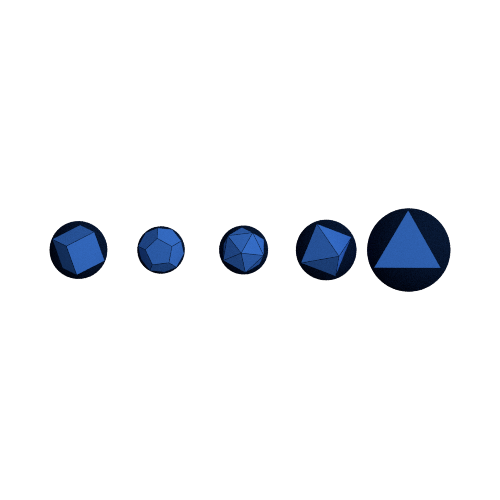

In [328]:
tracer = fresnel.tracer.Path(device=device, w=500, h=500)
out = tracer.sample(scene, samples=64, light_samples=40)
out

In [329]:
image = PIL.Image.fromarray(out[:], mode='RGBA')
image.save('circumspheres.png')